In [0]:
#importing the dataset
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#loading the datset from the sklearn preadded dataset
from sklearn.datasets import load_breast_cancer

In [0]:
#Creating the instance of the data
dataset=load_breast_cancer()

In [0]:
#checking the different keys of our datset
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
#converting the dataset into the dataframe 
data=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])

In [0]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


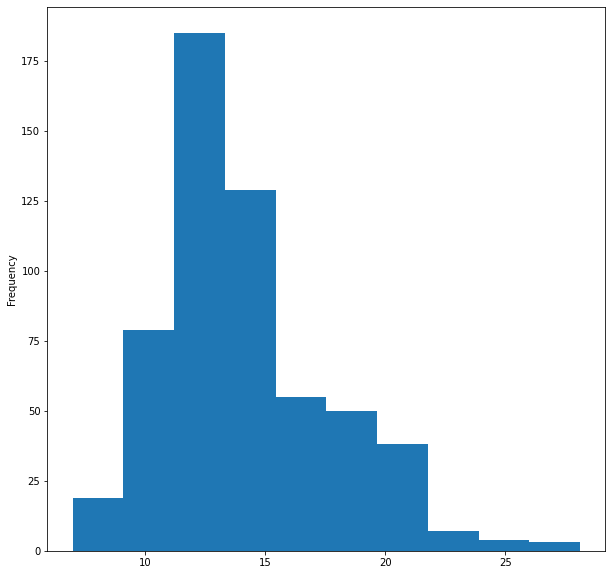

In [0]:
data['mean radius'].plot.hist(figsize=(10,10))

EDA( Exploratory Data Analysis)

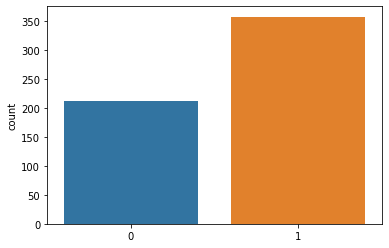

In [0]:
sns.countplot('target',data=dataset)

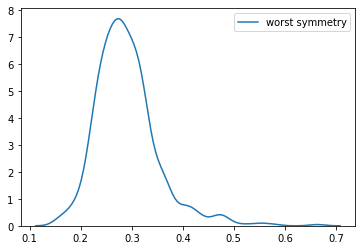

In [0]:
sns.kdeplot(data['worst symmetry'])

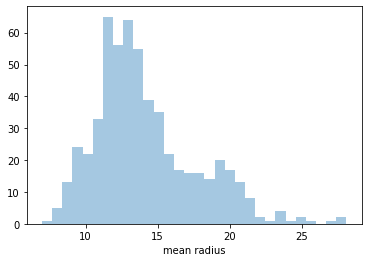

In [0]:
sns.distplot(data['mean radius'],kde=False,bins=30)

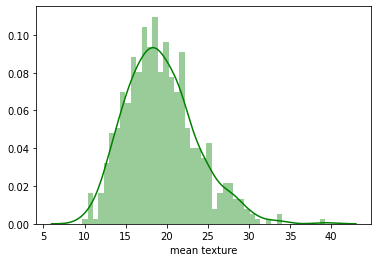

In [0]:
sns.distplot(data['mean texture'],kde=True,bins=45,color='green')

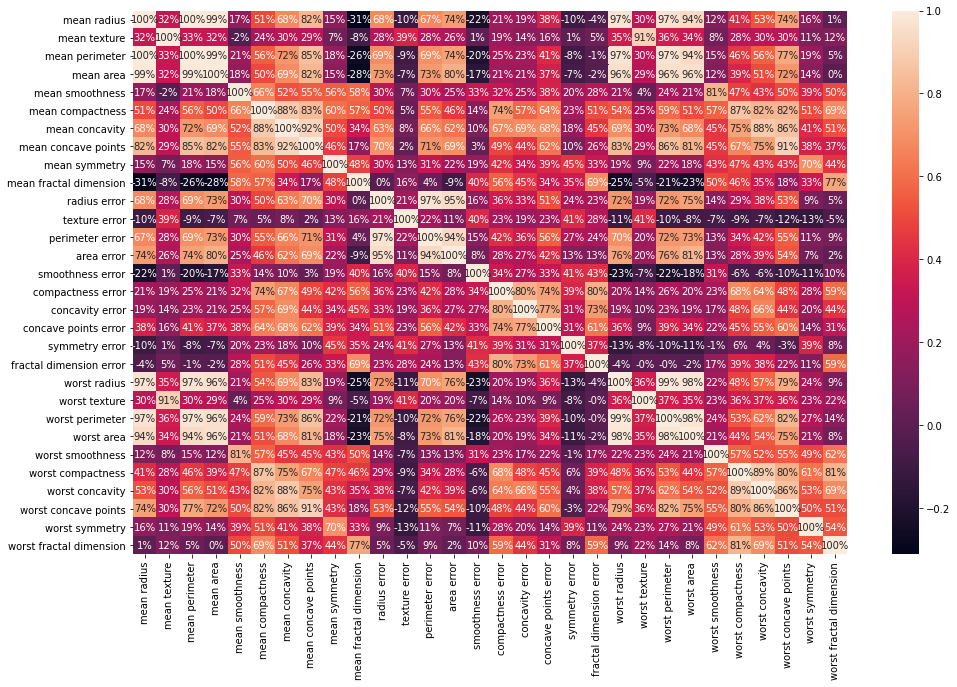

In [0]:
#Checking for any missing value or null value
corr=data.corr()
fig=plt.subplots(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt='.0%')

In [0]:
#Diving the data into x and y for training the model
#X-Contains the features on which the model will classify the type of breast cancer
#y-contains the original classifications
X=data
y=dataset['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [0]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
#from keras.models import Sequential
#from keras.layers import Dense
from keras.layers import Dropout 

In [0]:
#Intialising the ANN Model

model=Sequential()


In [0]:
#Adding the first hidden layer of our ANN Model
#units-Number of nodes we want to add in our hidden layer.
#kernel_intializer-The function is used to intialise the weights.
#input_dim=Number of nodes in the input layer
#activation=The Activation Function
#Dropout function is used to avoid overfitting 
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu',input_dim=30))

In [0]:
#Adding the Second hidden layer of our ANN Model
model.add(Dense(units=15,kernel_initializer='uniform',activation='sigmoid'))

In [0]:
#Adding the output layer of our ANN Model
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [0]:
#Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:

from tensorflow.python.keras.callbacks import ModelCheckpoint

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
#fitting the model to our dataset and specifying the number of batch_size and epochs
history=model.fit(X_train,y_train,epochs=50,batch_size=10,validation_data=(X_test,y_test),verbose=1,callbacks=callbacks_list)

Epoch 1/50
36/43 [========================>.....] - ETA: 0s - loss: 0.6745 - accuracy: 0.6306
Epoch 00001: val_accuracy improved from -inf to 0.61538, saving model to weights.best.hdf5
43/43 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.6315 - val_loss: 0.6548 - val_accuracy: 0.6154
Epoch 2/50
31/43 [====================>.........] - ETA: 0s - loss: 0.6247 - accuracy: 0.6419
Epoch 00002: val_accuracy improved from 0.61538 to 0.62937, saving model to weights.best.hdf5
43/43 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.6338 - val_loss: 0.5681 - val_accuracy: 0.6294
Epoch 3/50
35/43 [=======================>......] - ETA: 0s - loss: 0.5179 - accuracy: 0.7371
Epoch 00003: val_accuracy improved from 0.62937 to 0.88811, saving model to weights.best.hdf5
43/43 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7629 - val_loss: 0.4510 - val_accuracy: 0.8881
Epoch 4/50
36/43 [========================>.....] - 

In [0]:
model.load_weights(filepath)

In [0]:
model.save_weights(filepath)

In [0]:
model.save('model22.h5')

In [0]:
#making prediction of our model
prediction=model.predict(X_test)


In [0]:
#Evaluating the performance of our model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [0]:
prediction=(prediction>0.5)

In [0]:
#Confusion Matrix
confusion_matrix(y_test,prediction)

array([[54,  1],
       [ 1, 87]])

In [0]:
#Classifiaction Report 
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [0]:
#Accuracy of our Model
accuracy_score(y_test,prediction)

0.986013986013986

In [0]:
model_json = model.to_json()
with open("model22.json", "w") as json_file:
    json_file.write(model_json)

In [0]:

#from google.colab import files

#files.download("model22.json")
#files.download("model22.h5")